In [38]:
import rasterio
from skimage.measure import find_contours
import geopandas as gpd
from shapely.geometry import Polygon
from rasterio.crs import CRS
import matplotlib.pyplot as plt



In [31]:
input = '/home/ibex/Documents/tiffReader/30325064/170735614.tif'
output = '/home/ibex/Documents/tiffReader/output_vector_file.geojson'


In [32]:

# Open the GeoTIFF file
with rasterio.open(input) as src:
    # Read the raster data
    data = src.read(1)

    # Get the metadata
    meta = src.meta

    # Get the CRS (Coordinate Reference System)
    crs = src.crs

    # If CRS is None, set it to a default CRS, e.g., EPSG:4326
    if crs is None:
        crs = CRS.from_dict({'init': 'epsg:4326'})

    # Get the transform (geotransform)
    transform = src.transform



/home/ibex/.local/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [17]:
# Open the GeoTIFF file
with rasterio.open(input) as src:
    # Read the raster data
    data = src.read(1)

    # Get the metadata
    meta = src.meta

    # Get the CRS (Coordinate Reference System)
    crs = src.crs
     # If CRS is None, set it to a default CRS, e.g., EPSG:4326
    if crs is None:
        crs = CRS.from_dict({'init': 'epsg:4326'})

    # Get the transform (geotransform)
    transform = src.transform

/home/ibex/.local/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [34]:
# Detect contours in the raster data
contours = find_contours(data, 0.5)  # Adjust the threshold value as needed

# Create a list to store the vector features
features = []

# Convert contours to vector format
for contour in contours:
    # Convert contour coordinates to real-world coordinates
    coords = rasterio.transform.xy(transform, contour[:, 1], contour[:, 0])

    # Create a Polygon geometry from the contour coordinates
    poly = Polygon(zip(coords[0], coords[1]))

    # Add the feature to the list of features
    features.append(poly)


In [35]:

# Create a GeoDataFrame from the list of features
gdf = gpd.GeoDataFrame(geometry=features)

In [36]:
# Set the CRS of the GeoDataFrame
gdf.crs = crs

In [37]:


# Optionally, you can write the GeoDataFrame to a vector file (e.g., GeoJSON)
gdf.to_file(output, driver='GeoJSON')

# Print information about the vector data
print("Number of features:", len(gdf))
print("CRS:", gdf.crs)
print("Sample feature:", gdf.iloc[0])


Number of features: 240716
CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Sample feature: geometry    POLYGON ((5.00000 75.50000, 4.50000 75.00000, ...
Name: 0, dtype: geometry


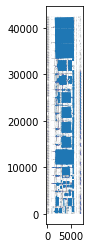

In [39]:
# Plot the GeoDataFrame
gdf.plot()

# Show the plot
plt.show()

In [40]:
gdf.to_file('/home/ibex/Documents/tiffReader/output_vector_file.shp')
